# Assignment_3 SVM

In [12]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , MinMaxScaler


# Part 2: SVM

### Use the following function to plot the classification regions

In [13]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # np.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Use the following dataset in questions 1, 2, and 3.

In [14]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

#### Question 1
Split the data into training and testing datasets (use random_state=0 and 25% of the data for testing)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=0, test_size=0.25)


#### Question 2
1. Train an SVM classifier using linear kernel.
2. Plot the classification regions using the training dataset.

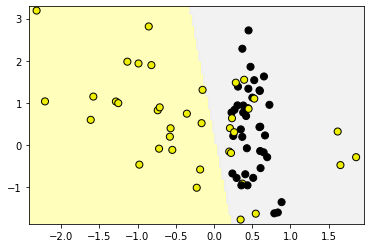

In [16]:
from sklearn.svm import SVC
svm_clf = Pipeline([("scaler", StandardScaler()),("svc", SVC(kernel = "linear"))])
svm_clf.fit(X_train, y_train)
plot_class_regions_for_classifier(svm_clf,X_train,y_train)


#### Question 3
1. Train an SVM classifier using linear kernel with C=0.00001.
2. Train another SVM classifier using linear kernel with C=100
3. Plot the classification regions for both cases using the training dataset.
4. Comment on the results.

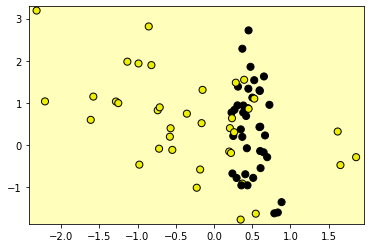

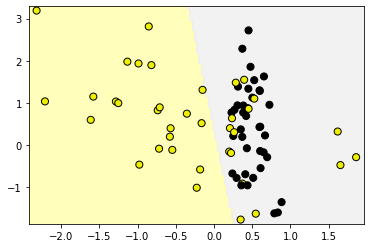

In [17]:
svm_clf2 = Pipeline([("scaler", StandardScaler()),("linear_svc", SVC(C=0.00001, kernel = "linear"))])
svm_clf3 = Pipeline([("scaler", StandardScaler()),("linear_svc", SVC(C=100,kernel = "linear"))])
svm_clf2.fit(X_train, y_train)
svm_clf3.fit(X_train, y_train)

plot_class_regions_for_classifier(svm_clf2,X_train,y_train)
plot_class_regions_for_classifier(svm_clf3,X_train,y_train)



when C=0.00001 the result classification region has high bias that it doesn't differnetiate between the two classes
as C increases reguaization incresases which result in lower bias and if C was higher it could result in high variance (overfitting)

### Use the fruits dataset in questions 4, 5, 6.

In [27]:
import pandas as pd
from sklearn.svm import LinearSVC
fruits = pd.read_table('fruit_data_with_colors.txt')
feature_names_fruits = ['height', 'width', 'mass', 'color_score']
fruits['fruit_name'].replace(['apple', 'mandarin' , 'orange' , 'lemon'],[0,1 ,2, 3], inplace=True)


#### Question 4
1. Split the data by columns into X_fruits and y_fruits where X_fruits is the data records and y_fruits is the labels.
2. Using only the **'height'** and **'width'** features, split the data into training and testing using random_state=0, and 25% of the data for testing.
3. Using **sklearn LinearSVC**, train a linear svm

In [28]:
#1
X_fruits = pd.DataFrame(fruits,columns = feature_names_fruits)
y_fruits = fruits['fruit_name'].values
#2
X_2f = X_fruits.iloc[:,[0,1]]
X_2farr = X_2f.values
X_train, X_test, y_train, y_test = train_test_split(X_2farr, y_fruits , random_state=0 , test_size=0.25)
#3
clf =LinearSVC()
clf.fit(X_train,y_train)
print(clf.get_params(deep=True))






{'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### Question 5
For the previous model from question 4. 
1. How many SVM models have been trained? and Why?
2. Print the models' coefficients and intercepts.

there are 4 trained models as there are 4 classes each class is trained against the rest of classes (one vs all)


In [29]:
print(clf.coef_)
print(clf.intercept_)

[[-0.27949594  0.47919188]
 [-1.10777685  0.7897501 ]
 [-0.01577708  0.20831936]
 [ 1.0086761  -1.26268956]]
[-1.53104826  0.78670159 -1.7724954   0.37141851]


#### Question 6
Plot the classification boundary of each svm on a scatter plot of the training data.

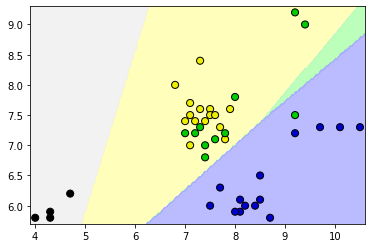

In [30]:
plot_class_regions_for_classifier(clf,X_train,y_train)


from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)### Use the breast cancer dataset in question 7, 8, and9.

In [31]:
from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
print(X_cancer.shape)

(569, 30)


#### Question 7
1. Split the dataset into training and testing datasets, use random_state = 0, and 25% of the data for testing.
2. Use GridSearchCV to find the best C value for and SVM classifier with rbf kernel and print the best C value. *use:*  
```python
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
```
3. Print the best parameters resulted from your grid search.

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import svm
#1
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer , random_state=0, test_size=0.25)
#2
svm_clf = svm.SVC()
parameters =  {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
clf_GS = GridSearchCV(svm_clf,parameters)
clf_GS.fit(X_train, y_train)
#3
print(clf_GS.estimator.get_params())
                               


{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


#### Question 8
Train an SVM model using the best parameters resulted from question 7, then calculate and print the training and testing accuracy.

In [33]:
svm_cl1 = svm.SVC(kernel='rbf', C=1)
svm_cl1.fit(X_train,y_train)
print('training score' ,svm_cl1.score(X_train,y_train))
print('test score' ,svm_cl1.score(X_test,y_test))



training score 0.903755868544601
test score 0.9370629370629371


#### Question 9
Improve the previous results from question 8.

**Hint:** Don't change the model, instead, make some preprocessing on the data.

In [34]:
#using standard scaler
svm_cl2 = Pipeline([("scaler", StandardScaler()),("svc",svm.SVC(kernel='rbf', C=1))])
svm_cl2.fit(X_train, y_train)
print('training score' ,svm_cl2.score(X_train,y_train))
print('test score' ,svm_cl2.score(X_test,y_test))



training score 0.9859154929577465
test score 0.965034965034965


In [35]:
#using min-max scaler
svm_cl3 = Pipeline([("scaler", MinMaxScaler()),("svc",svm.SVC(kernel='rbf', C=1))])
svm_cl3.fit(X_train, y_train)
print('training score' ,svm_cl3.score(X_train,y_train))
print('test score' ,svm_cl3.score(X_test,y_test))

training score 0.9835680751173709
test score 0.972027972027972
